In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# Equtations

Starting equations:

$$
T = (1-R)^2e^{-\alpha d}
$$

as $I_0=(1-R)^2$ in Beer-Lambert law. Therefore absorption coefficient $\alpha$ [cm-1]:

$$
\alpha = \frac{1}{d} \ln\left(\frac{(1-R)^2}{T}\right)
$$

where d is the sample thickness, R and T are reflection and transmission (fractional), respectively. Neglecting fresnel reflection this simplifies to

$$
\alpha = -\frac{1}{d} \ln(T).
$$

Using the cross-section of OH at 2.73um, $\sigma_{OH} =  1.2E-19$cm-1, and knowledge that absorption at this wavelength in glass is due to water, we can evaluate the number density of OH [cm-3]

$$
N_{OH} = \frac{\alpha}{\sigma_{OH}}
$$

[1] DOI: 10.1016/0925-3467(95)00063-1

To convert to ppm: https://doi.org/10.1016/j.vibspec.2008.01.004

Note: Because the OHabsorption peak shifts slightly depending on the OH concentration, the optimal method is to search for the exact Tmin, instead measuring the Tmin at a fixed wavelength.

In [2]:
# Thickness of samples (cm)
d = 0.11 

# Absorption cross section of OH in glass (cm2) @ 2.73um or 3662cm-1 
sig_OH = 1.2E-19

# FTIR

<IPython.core.display.Javascript object>


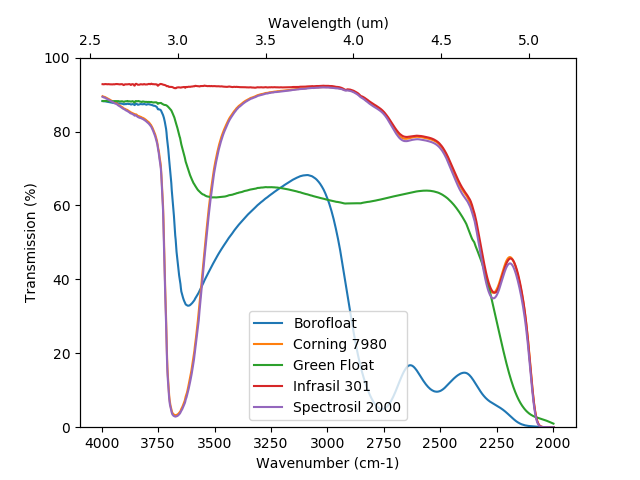

In [5]:
path = './FTIR/'
files = [x for x in os.listdir(path) if '.DPT'in x]

fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

store = {}
for f in files:
    result = np.genfromtxt(path + f)
    f = f.split('.')[0]
    # Wavenumber
    x = result[:, 0]
    # Transmission
    y = result[:, 1]
    ax1.plot(x, 100*y, label=f)
    
    # Store number of OH
    y = y[np.where(x >= 3663)[0][0]]
    alpha = -np.log(y)/d
    store[f] = alpha / sig_OH

# In wavenumber so x is descending
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
ax1.legend()
ax2.set_ylim(0, 100)
lb, ub = ax1.get_xlim()
ax2.set_xlim(10000/lb, 10000/ub)
ax2.set_xlabel('Wavelength (um)')

<IPython.core.display.Javascript object>


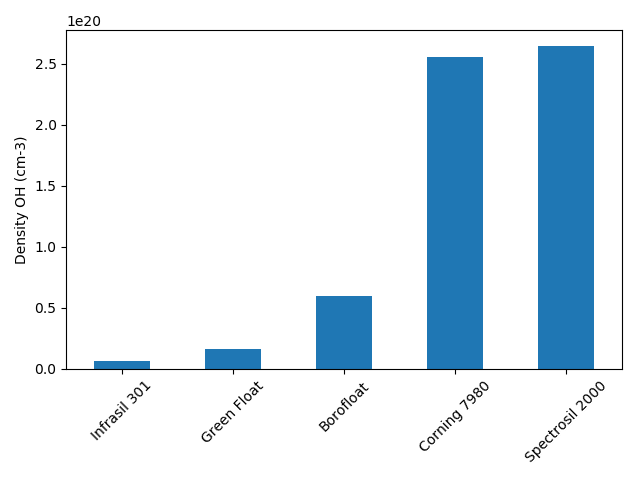

In [6]:
store = pd.Series(store, name='Sample')
store = store.sort_values()

fig, ax = plt.subplots()
store.plot(kind='bar', rot=45)
ax.set_ylabel('Density OH (cm-3)')
plt.tight_layout()

# Individual Sample

<IPython.core.display.Javascript object>


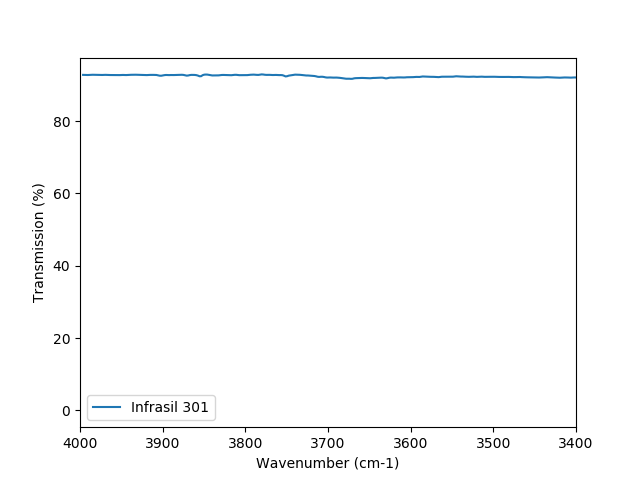

(4000.0, 3400.0)

In [23]:
fig, ax1 = plt.subplots()

path = './FTIR/'
f = [x for x in os.listdir(path) if '.DPT' in x and 'Infrasil' in x][0]
result = np.genfromtxt(path + f)
f = f.split('.')[0]
# Wavenumber (cm-1)
x = result[:, 0]
# Transmission (%)
y = result[:, 1] * 100

ax1.plot(x, y, label=f)
ax1.legend()
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
# ax1.set_ylim(0, 100)
ax1.set_xlim(3400, 4000)
ax1.set_xlim(ax1.get_xlim()[::-1])

<IPython.core.display.Javascript object>


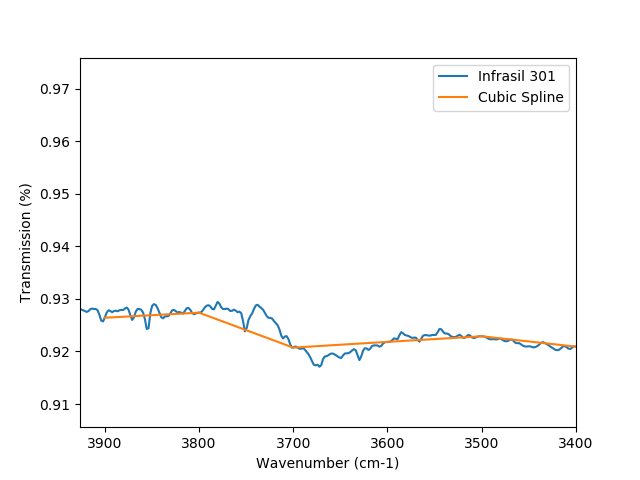

(4000.0, 3400.0)

In [38]:
from scipy import interpolate
tck = interpolate.splrep(x, y)
xnew = np.arange(3400, 4000, 0.1)
ynew = interpolate.splev(xnew, tck, der=0)

fig, ax1 = plt.subplots()
ax1.plot(x, y, label=f)
ax1.plot(xnew, ynew, label='Cubic Spline')
ax1.legend()
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
# ax1.set_ylim(0, 100)
ax1.set_xlim(3400, 4000)
ax1.set_xlim(ax1.get_xlim()[::-1])